In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.data", sep='\t', names=["user id", "movie id", "rating", "timestamp"])

In [3]:
df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
dfgenre = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.genre")

In [5]:
dfgenre

,unknown|0
0,Action|1
1,Adventure|2
2,Animation|3
3,Children's|4
4,Comedy|5
5,Crime|6
6,Documentary|7
7,Drama|8
8,Fantasy|9
9,Film-Noir|10


In [6]:
column_names = [
    "movie id", "movie title", "release date", "video release date",
    "IMDb URL", "unknown", "Action", "Adventure", "Animation",
    "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
    "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
    "Thriller", "War", "Western"
]

In [7]:
dfitems = pd.read_csv("g:\\VSCODE\\MovieLensData\\Social_media_analytics\\Req\\u.item", sep='|', names=column_names, encoding='latin-1')

In [8]:
movie_titles = dfitems['movie title'].tolist()

In [9]:
cleaned_titles = [title.rsplit(' (', 1)[0] for title in movie_titles]

# Print the cleaned titles
print(cleaned_titles)

['Toy Story', 'GoldenEye', 'Four Rooms', 'Get Shorty', 'Copycat', 'Shanghai Triad (Yao a yao yao dao waipo qiao)', 'Twelve Monkeys', 'Babe', 'Dead Man Walking', 'Richard III', 'Seven (Se7en)', 'Usual Suspects, The', 'Mighty Aphrodite', 'Postino, Il', "Mr. Holland's Opus", 'French Twist (Gazon maudit)', 'From Dusk Till Dawn', 'White Balloon, The', "Antonia's Line", 'Angels and Insects', 'Muppet Treasure Island', 'Braveheart', 'Taxi Driver', 'Rumble in the Bronx', 'Birdcage, The', 'Brothers McMullen, The', 'Bad Boys', 'Apollo 13', 'Batman Forever', 'Belle de jour', 'Crimson Tide', 'Crumb', 'Desperado', 'Doom Generation, The', 'Free Willy 2: The Adventure Home', 'Mad Love', 'Nadja', 'Net, The', 'Strange Days', 'To Wong Foo, Thanks for Everything! Julie Newmar', 'Billy Madison', 'Clerks', 'Disclosure', 'Dolores Claiborne', 'Eat Drink Man Woman', 'Exotica', 'Ed Wood', 'Hoop Dreams', 'I.Q.', 'Star Wars', 'Legends of the Fall', 'Madness of King George, The', 'Natural Born Killers', 'Outbreak'

In [10]:
dfitems.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df_movies = dfitems[['movie id','movie title']]
df_movies.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [12]:
df_merged = pd.merge(df, df_movies, how='inner', on='movie id')
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [13]:
df_merged.head()

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


In [14]:
movie_user_counts = df_merged.groupby(['movie title', 'user id']).size().reset_index(name='count')
movie_user_counts_sorted = movie_user_counts.sort_values('count', ascending=False)

movie_user_counts_sorted

,movie title,user id,count
16556,Chasing Amy (1997),268,2
16557,Chasing Amy (1997),269,2
11802,Body Snatchers (1993),524,2
11803,Body Snatchers (1993),537,2
44856,"Ice Storm, The (1997)",354,2
...,...,...,...
99672,"Young Poisoner's Handbook, The (1995)",861,1
99673,"Young Poisoner's Handbook, The (1995)",865,1
99674,"Young Poisoner's Handbook, The (1995)",868,1
99675,"Young Poisoner's Handbook, The (1995)",871,1


In [15]:
df_merged[(df_merged['movie title'] == 'Body Snatchers (1993)') & (df_merged['user id'] == 833)]


,user id,movie id,rating,timestamp,movie title
66833,833,670,1,875124428,Body Snatchers (1993)
68445,833,573,1,875223976,Body Snatchers (1993)


In [16]:

refined_dataset = df_merged.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [17]:

num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664


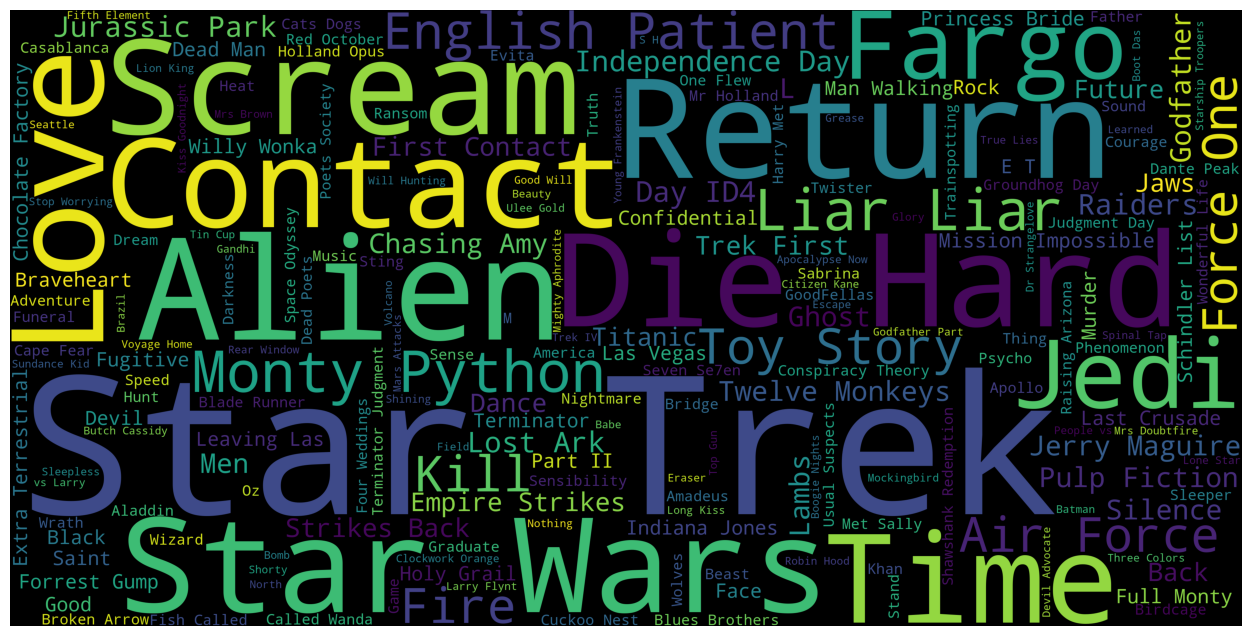

In [18]:
# Import new libraries
%matplotlib inline
import matplotlib.pyplot as plt

import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
df_merged['movie title'] = df_merged['movie title'].fillna("").astype('str')
title_corpus = ' '.join(df_merged['movie title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

C:\Users\gurut\AppData\Local\Temp\ipykernel_6380\4278949494.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged['rating'].fillna(df_merged['rating'].median()))


<Axes: xlabel='rating', ylabel='Density'>

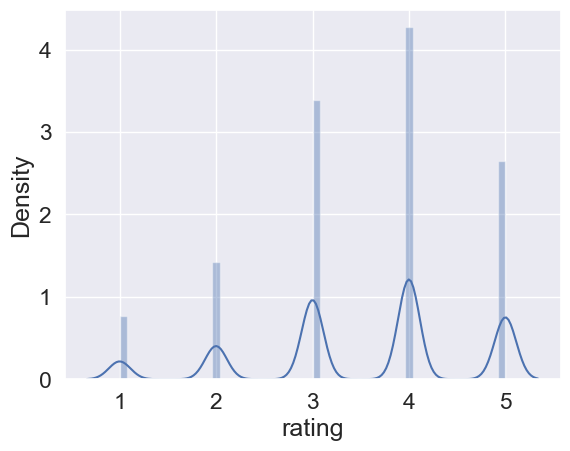

In [19]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(df_merged['rating'].fillna(df_merged['rating'].median()))

Collaborative Filtering



The Collaborative Filtering Recommender is entirely based on the past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes and choices of two users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that.

For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie 1. This makes it one of the most commonly used algorithm as it is not dependent on any additional information.

In general, collaborative filtering is the workhorse of recommender engines. The algorithm has a very interesting property of being able to do feature learning on its own, which means that it can start to learn for itself what features to use. It can be divided into Memory-Based Collaborative Filtering and Model-Based Collaborative filtering. In this post, I'll only focus on the Memory-Based Collaborative Filtering technique.

In [20]:
# Fill NaN values in user_id and movie_id column with 0
df_merged['user id'] = df_merged['user id'].fillna(0)
df_merged['movie id'] = df_merged['movie id'].fillna(0)

# Replace NaN values in rating column with average of all values
df_merged['rating'] = df_merged['rating'].fillna(df_merged['rating'].mean())

In [21]:
# Randomly sample 5% of the ratings dataset
small_data = df_merged.sample(frac=0.05)
# Check the sample info
print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 10942 to 3394
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user id      5000 non-null   int64 
 1   movie id     5000 non-null   int64 
 2   rating       5000 non-null   int64 
 3   timestamp    5000 non-null   int64 
 4   movie title  5000 non-null   object
dtypes: int64(4), object(1)
memory usage: 234.4+ KB
None


In [37]:
small_data.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title'], dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(small_data, test_size=0.2)

In [23]:
# Create user-item matrices for training and testing
train_data_matrix = train_data[['user id', 'movie id', 'rating']].to_numpy()
test_data_matrix = test_data[['user id', 'movie id', 'rating']].to_numpy()

# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(4000, 3)
(1000, 3)


In [24]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data_matrix, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[ 1.         -0.16628672 -0.37283465  0.34957756]
 [-0.16628672  1.          0.97697654  0.86573318]
 [-0.37283465  0.97697654  1.          0.73901971]
 [ 0.34957756  0.86573318  0.73901971  1.        ]]


In [25]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

# Ensure train_data_matrix is clean and handle NaN values
train_data_matrix = np.nan_to_num(train_data_matrix)  # Replace NaNs with 0

# Compute Item Similarity Matrix using correlation metric
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')

# Replace any remaining NaN values in the similarity matrix with 0
item_correlation[np.isnan(item_correlation)] = 0

# Print a portion of the similarity matrix for verification
print(item_correlation[:4, :4])

[[ 1.          0.00973227 -0.00719368]
 [ 0.00973227  1.         -0.16429783]
 [-0.00719368 -0.16429783  1.        ]]


In [26]:
# Function to predict ratings
def predict(ratings, similarity, type='user'):
    if type == 'user':
        # Compute mean rating for each user
        mean_user_rating = ratings.mean(axis=1)
        # Center ratings by subtracting the mean rating
        ratings_diff = ratings - mean_user_rating[:, np.newaxis]  # np.newaxis ensures proper broadcasting
        # Predict ratings based on user similarity
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        # Predict ratings based on item similarity
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    else:
        raise ValueError("Invalid type. Choose 'user' or 'item'.")
    return pred

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Extract nonzero elements (ignoring missing ratings)
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    # Compute RMSE
    return sqrt(mean_squared_error(pred, actual))

In [28]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

# RMSE on the test data
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 296.8270670480188
Item-based CF RMSE: 337.1939572973205


In [29]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 140.14587009838195
Item-based CF RMSE: 63.8449357720053


In [30]:
train_data_matrix = np.nan_to_num(train_data_matrix, nan=0)
test_data_matrix = np.nan_to_num(test_data_matrix, nan=0)

In [31]:
# Matrix Factorization using SVD
def matrix_factorization_svd(ratings, k):
    """
    Perform matrix factorization using Singular Value Decomposition (SVD).
    
    Parameters:
    - ratings: User-Item matrix (numpy array) with ratings.
    - k: Number of latent factors to retain.
    
    Returns:
    - predicted_ratings: Predicted ratings matrix after reconstruction.
    """
    # Step 1: Perform Singular Value Decomposition
    U, sigma, Vt = np.linalg.svd(ratings, full_matrices=False)
    
    # Step 2: Retain only the top-k singular values
    sigma_k = np.diag(sigma[:k])  # Convert top-k singular values into a diagonal matrix
    U_k = U[:, :k]               # Top-k left singular vectors
    Vt_k = Vt[:k, :]             # Top-k right singular vectors
    
    # Step 3: Reconstruct the ratings matrix with reduced dimensions
    predicted_ratings = np.dot(np.dot(U_k, sigma_k), Vt_k)
    
    return predicted_ratings

In [32]:
# Number of latent factors to retain
k = 7
    
# Perform SVD-based Matrix Factorization
predicted_ratings = matrix_factorization_svd(train_data_matrix, k)

# Calculate RMSE on test data
error = rmse(predicted_ratings, test_data_matrix)

print("Predicted Ratings Matrix:")
print(predicted_ratings)

print(f"RMSE on Test Data: {error}")

Predicted Ratings Matrix:
[[467.   7.   5.]
 [234. 660.   4.]
 [ 62. 401.   3.]
 ...
 [501. 274.   3.]
 [455.  69.   4.]
 [541. 501.   4.]]
RMSE on Test Data: 348.9269140283296


In [33]:
def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [34]:
from numpy.random import normal

# Probabilistic Matrix Factorization (PMF) Implementation
def pmf(train_data_matrix, num_users, num_items, latent_features, learning_rate, reg_param, epochs):
    """
    Perform Probabilistic Matrix Factorization (PMF).

    Parameters:
    - train_data_matrix: User-Item matrix with ratings.
    - num_users: Number of users.
    - num_items: Number of items.
    - latent_features: Number of latent features.
    - learning_rate: Learning rate for gradient descent.
    - reg_param: Regularization parameter.
    - epochs: Number of iterations.

    Returns:
    - user_features: User latent feature matrix.
    - item_features: Item latent feature matrix.
    - predicted_ratings: Predicted ratings matrix.
    """
    # Initialize user and item latent feature matrices
    user_features = normal(scale=1./latent_features, size=(num_users, latent_features))
    item_features = normal(scale=1./latent_features, size=(num_items, latent_features))

    # Training process
    for epoch in range(epochs):
        for i in range(num_users):
            for j in range(num_items):
                if train_data_matrix[i, j] > 0:  # Only consider non-zero ratings
                    error = train_data_matrix[i, j] - np.dot(user_features[i, :], item_features[j, :].T)
                    # Update user and item latent features
                    user_features[i, :] += learning_rate * (error * item_features[j, :] - reg_param * user_features[i, :])
                    item_features[j, :] += learning_rate * (error * user_features[i, :] - reg_param * item_features[j, :])

        # Optional: Print loss at each epoch for debugging
        if epoch % 10 == 0:
            loss = 0
            for i in range(num_users):
                for j in range(num_items):
                    if train_data_matrix[i, j] > 0:
                        loss += (train_data_matrix[i, j] - np.dot(user_features[i, :], item_features[j, :].T))**2
                        loss += reg_param * (np.linalg.norm(user_features[i, :]) + np.linalg.norm(item_features[j, :]))
            print(f"Epoch {epoch}, Loss: {loss}")

    # Compute predicted ratings
    predicted_ratings = np.dot(user_features, item_features.T)
    
    return user_features, item_features, predicted_ratings

In [35]:
num_users, num_items = train_data_matrix.shape
latent_features = 2      # Number of latent factors
learning_rate = 0.01     # Learning rate for gradient descent
reg_param = 0.1          # Regularization parameter to prevent overfitting
epochs = 100             # Number of training iterations

# Perform PMF
user_features_pmf, item_features_pmf, predicted_ratings_pmf = pmf(
    train_data_matrix,
    num_users,
    num_items,
    latent_features,
    learning_rate,
    reg_param,
    epochs
)

nan_in_predicted = np.isnan(predicted_ratings_pmf).sum()
nan_in_test = np.isnan(test_data_matrix).sum()
print(f"NaN in predicted ratings: {nan_in_predicted}")
print(f"NaN in test data: {nan_in_test}")

# Handle NaN values by replacing them with 0
predicted_ratings_pmf = np.nan_to_num(predicted_ratings_pmf, nan=0)

# Verify that NaN values are handled
nan_in_predicted_after = np.isnan(predicted_ratings_pmf).sum()
print(f"NaN in predicted ratings after handling: {nan_in_predicted_after}")

# Calculate RMSE
pmf_rmse_value = rmse(predicted_ratings_pmf, test_data_matrix)
print(f"PMF RMSE on Test Data: {pmf_rmse_value}")

C:\Users\gurut\AppData\Local\Temp\ipykernel_6380\4118662832.py:33: RuntimeWarning: overflow encountered in multiply
  user_features[i, :] += learning_rate * (error * item_features[j, :] - reg_param * user_features[i, :])
C:\Users\gurut\AppData\Local\Temp\ipykernel_6380\4118662832.py:34: RuntimeWarning: invalid value encountered in subtract
  item_features[j, :] += learning_rate * (error * user_features[i, :] - reg_param * item_features[j, :])


Epoch 0, Loss: nan
Epoch 10, Loss: nan
Epoch 20, Loss: nan
Epoch 30, Loss: nan
Epoch 40, Loss: nan
Epoch 50, Loss: nan
Epoch 60, Loss: nan
Epoch 70, Loss: nan
Epoch 80, Loss: nan
Epoch 90, Loss: nan
NaN in predicted ratings: 12000
NaN in test data: 0
NaN in predicted ratings after handling: 0
PMF RMSE on Test Data: 439.84843488031953


In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset

# Assuming small_data is a pandas DataFrame with columns: 'user_id', 'movie_id', 'rating'
# Example: small_data = pd.DataFrame({'user_id': [...], 'movie_id': [...], 'rating': [...]})

# Step 1: Map user and item IDs to zero-based indices
def remap_ids(data):
    user_mapping = {old_id: new_id for new_id, old_id in enumerate(data['user id'].unique())}
    item_mapping = {old_id: new_id for new_id, old_id in enumerate(data['movie id'].unique())}
    
    data['user id'] = data['user id'].map(user_mapping)
    data['movie id'] = data['movie id'].map(item_mapping)
    
    return data, len(user_mapping), len(item_mapping)

In [46]:
# Step 2: Split the data into training and testing sets
train_data, test_data = train_test_split(small_data, test_size=0.2)

# Remap IDs for both train and test datasets
train_data, num_users, num_items = remap_ids(train_data)
test_data['user id'] = test_data['user id'].map({old: new for new, old in enumerate(train_data['user id'].unique())})
test_data['movie id'] = test_data['movie id'].map({old: new for new, old in enumerate(train_data['movie id'].unique())})

test_data.dropna(inplace=True)  # Drop rows with unmapped IDs

In [47]:
# Step 3: Create PyTorch Dataset class
class InteractionDataset(Dataset):
    def __init__(self, user_ids, item_ids, ratings):
        self.user_ids = torch.LongTensor(user_ids)
        self.item_ids = torch.LongTensor(item_ids)
        self.ratings = torch.FloatTensor(ratings)

    def __len__(self):
        return len(self.ratings)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.item_ids[idx], self.ratings[idx]

# Prepare training and testing datasets
train_dataset = InteractionDataset(
    user_ids=train_data['user id'].values,
    item_ids=train_data['movie id'].values,
    ratings=train_data['rating'].values
)

test_dataset = InteractionDataset(
    user_ids=test_data['user id'].values,
    item_ids=test_data['movie id'].values,
    ratings=test_data['rating'].values
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [48]:
# Step 4: Define the Hybrid Recommender Model (same as before)
class HybridRecommender(nn.Module):
    def __init__(self, num_users, num_items, embedding_dim=50, hidden_dim=128):
        super(HybridRecommender, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.item_embedding = nn.Embedding(num_items, embedding_dim)
        
        self.fc1 = nn.Linear(embedding_dim * 2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.output = nn.Linear(hidden_dim // 2, 1)
        
        self.dropout = nn.Dropout(0.2)
        self.activation = nn.ReLU()

    def forward(self, user_ids, item_ids):
        user_embeds = self.user_embedding(user_ids)
        item_embeds = self.item_embedding(item_ids)
        x = torch.cat([user_embeds, item_embeds], dim=-1)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        return self.output(x).squeeze()

In [49]:
# Step 5: Initialize model and train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridRecommender(num_users=num_users, num_items=num_items).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, device, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for user_ids, item_ids, ratings in train_loader:
            user_ids = user_ids.to(device)
            item_ids = item_ids.to(device)
            ratings = ratings.to(device)

            optimizer.zero_grad()
            predictions = model(user_ids, item_ids)
            loss = criterion(predictions, ratings)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")

train_model(model=model,
            train_loader=train_loader,
            criterion=criterion,
            optimizer=optimizer,
            device=device,
            epochs=10)

def evaluate_model(model, test_loader):
    model.eval()
    predictions_list = []
    actual_list = []
    
    with torch.no_grad():
        for user_ids, item_ids, ratings in test_loader:
            predictions_list.append(model(user_ids.to(device), item_ids.to(device)).cpu())
            actual_list.append(ratings.cpu())
    
    predictions_list = torch.cat(predictions_list).numpy()
    actual_list = torch.cat(actual_list).numpy()
    
    rmse_value = np.sqrt(((predictions_list - actual_list) ** 2).mean())
    return rmse_value

rmse_value = evaluate_model(model=model,
                            test_loader=test_loader)

print(f"Test RMSE: {rmse_value}")

Epoch 1/10, Loss: 2.9627516918182373
Epoch 2/10, Loss: 1.285290385246277
Epoch 3/10, Loss: 1.1721108498573303
Epoch 4/10, Loss: 1.0589527616500853
Epoch 5/10, Loss: 1.0044422788619995
Epoch 6/10, Loss: 0.8988265779018402
Epoch 7/10, Loss: 0.8477909965515137
Epoch 8/10, Loss: 0.7993458700180054
Epoch 9/10, Loss: 0.742753520488739
Epoch 10/10, Loss: 0.7216880915164947
Test RMSE: 1.2506581544876099
